In [1]:
#import pandas
import pandas as pd

In [2]:
#read the housing dataset
housing = pd.read_csv (r'data/house.csv')

In [3]:
#get a look and feel of the dataframe, head?
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#get a look and feel of the dataframe, info?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<font color = purple> total rows in the dataframe - 20640 <br>
partially filled - total_bedrooms has missing values<br>
<br>
<br>
let's see what 'ocean_proximity' the object data type looks like </font>

In [5]:
# If editing data, always make changes to a copy.
housingCopy = housing.copy()
# look at ocean proximity
housingCopy['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#use the method describe() to see what some statistical summary about your dataframe
housingCopy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Count** - <font color = purple> # of filled indices in the columns <br> </font>
**mean, max, min** - <font color = purple> self explantory <br> </font>
**std** - <font color = purple> standard deviation <br> </font>
**25%, 50%, 75%** - <font color = purple> $1^{st}$ quartile, median and $3^{rd}$ quartile <br> <font>

<font color = purple> another way to get an idea of what your data looks like is plotting histograms for each column. This may not be feasible when you have high dimensional data (too many columns) </font>

In [7]:
#import sys
#!{sys.executable} -m pip install matplotlib
import matplotlib as mpl
%matplotlib inline

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

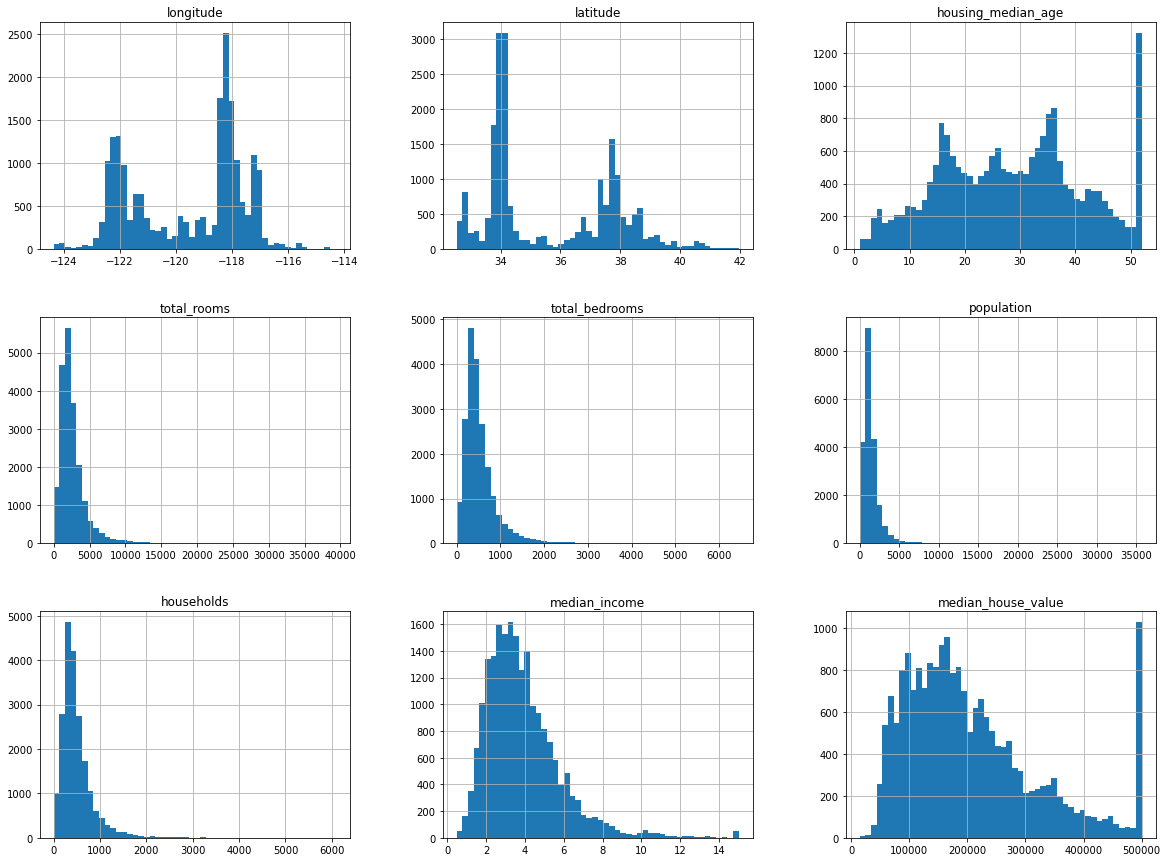

In [8]:
#draw histograms
housingCopy.hist(bins = 50, figsize=(20,15))
#mpl.pyplot.show()

### <font color = blue> What do you observe from the plots?<br></font>
**median_income** - cout it be $12? <br>
<font color=purple>the numbers roughly represent tens of thousands of dollars </font> <br><br>


**median_age** - is it possible that the maximum age be just around 50-55?<br>
**median_house_value** - can the prices be not higher than $500,000 <br>
<font color=purple> both the values have been capped. This could seriously affect your learning algorithm's training in real life prediction. However, for now this is ok for the purpose of this lecture </font>

**latitude &amp longitude** - they will not be fed as predictor to learning algorithm but could possibly help us see the data density from geogrphic point of view

**general observations** - <br> <font color=purple>
1. there are different types of features (let's not forget ocean_proximity - the categorical predictor)
2. numerical features have different scales which may affect the learning process of the algorithm: either adversely, could be crucial for learning or may have no impact at all.
3. these histograms are generally tail skewed, more values further to the left of the median as compared to the right. Again, may or may not impact the learning process for some algorithms</font>

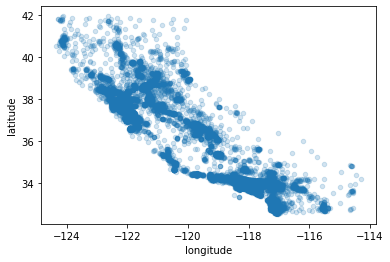

In [9]:
#plot the latitude and longitudes from the original dataframe
#play around with parameter alpha
housingCopy.plot(kind='scatter', x='longitude', y='latitude', alpha =0.2)
mpl.pyplot.show()

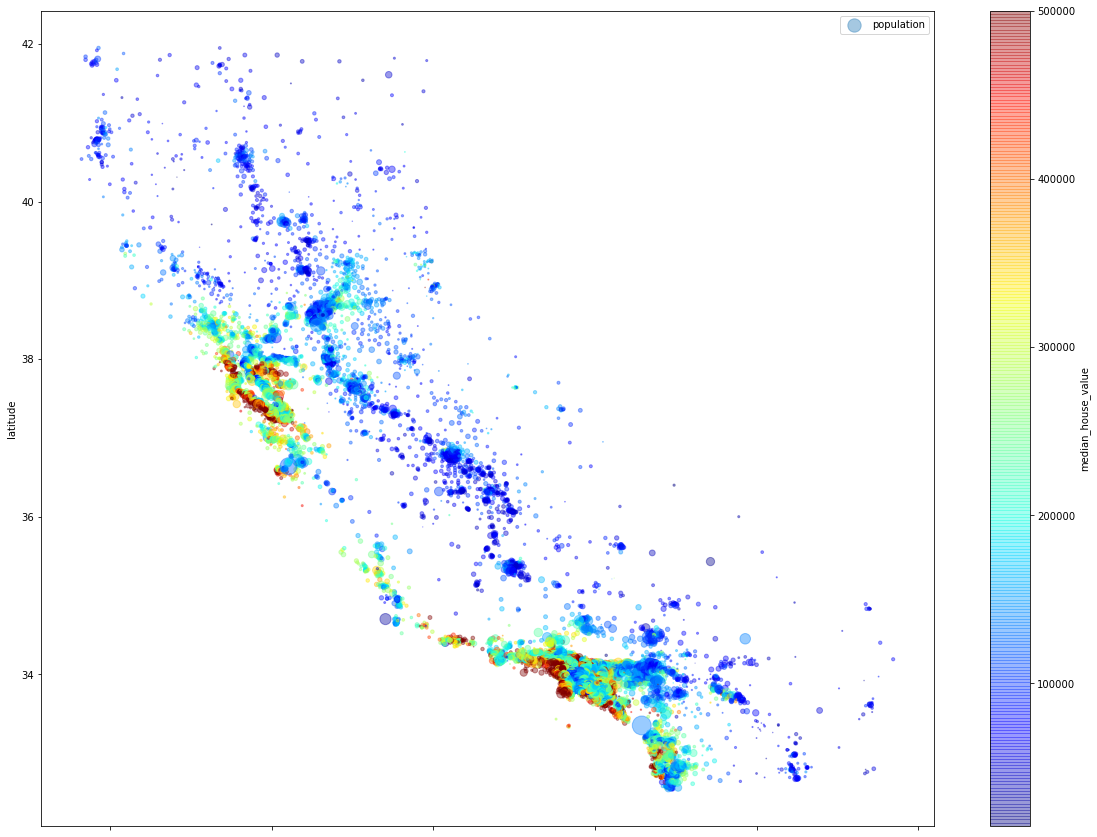

In [10]:
#try other parameters of method plot
housingCopy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
              s = housingCopy['population']/100, label='population',
              figsize=(20,15), 
              c = 'median_house_value',
              cmap = mpl.pyplot.get_cmap('jet'), colorbar=True)
mpl.pyplot.legend()
mpl.pyplot.show()

any observations?
1. higher prices near the edges probably facing the ocean ?
The houses closer to the ocean are more expensive.

## <font color = blue> Missing values - bedrooms </font>

let's move back to lecture and build some concepts!<br><br>

now that we are back let's check how many NA/missing values in 'total_bedrooms' are there

In [11]:
#count the total number of missing values in total_bedrooms columns
#dataCopy.isna().sum()
housingCopy['total_bedrooms'].isna().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

Try : replace the missing values to some value (zero, mean, median, etc.) <br><br>

<font color = red>note: make sure you try this on a copy of actual dataframe, rather than loosing the information from actual dataframe.</font><br><br>


hint for mean and median, use python's mean and median methods

In [12]:
housingCopy['total_bedrooms'].fillna(0,inplace = True)

In [13]:
housingCopy['total_bedrooms'].isna().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

In [14]:
housingCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
#now try imputing with median, mean
#dataCopy['total_bedrooms'].fillna(dataCopy['total_bedrooms'].mean(),inplace = True)
# print(dataCopy['total_bedrooms'])
median_tb = housing['total_bedrooms'].median()
mean_tb = housing['total_bedrooms'].mean()
print(median_tb)
print(mean_tb)

435.0
537.8705525375618


another useful python supported imputation method is interpolate. You can try it in your own time.<br>

[url to documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) <br>
[url to examples](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)


### <font color = blue> now let's use K-NN for missing value imputation </font>

In [16]:
# import KNN from fancyimpute
from fancyimpute import KNN

In [17]:
# make a copy of the original data frame, to try KNN imputation on it.
housing_imp = housing.copy()

In [18]:
#name it housing_imp
housing_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
# Create training dataset
# only get target variables
# x_housing_imp_train = housing_imp[housing_imp['total_bedrooms'].notnull()].drop(columns = ['total_bedrooms'])
# y_housing_imp_train = housing_imp[housing_imp['total_bedrooms'].notnull()]['total_bedrooms']

In [20]:
# Create testing dataset
#x_housing_imp_test = housing_imp[housing_imp['total_bedrooms'].null()].drop(columns = ['total_bedrooms'])
#y_housing_imp_test = housing_imp['total_bedrooms'].notnull()

In [21]:
# housing_imp = KNN(k=3).fit_transform(housing_imp)
# will have an error (need to convert string to float)


In [22]:
housing_imp['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
proximity_mapping = {'ocean_proximity': {'INLAND' : 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND':4, '<1H OCEAN':5}}
proximity_mapping.items()                               

dict_items([('ocean_proximity', {'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4, '<1H OCEAN': 5})])

In [24]:
housing_imp.replace(proximity_mapping, inplace = True)
housing_imp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [25]:
#try with 3 neighbours first
housing_imp = KNN(k=3).fit_transform(housing_imp)

Imputing row 1/20640 with 0 missing, elapsed time: 54.751
Imputing row 101/20640 with 0 missing, elapsed time: 54.751
Imputing row 201/20640 with 0 missing, elapsed time: 54.752
Imputing row 301/20640 with 0 missing, elapsed time: 54.752
Imputing row 401/20640 with 0 missing, elapsed time: 54.753
Imputing row 501/20640 with 0 missing, elapsed time: 54.753
Imputing row 601/20640 with 0 missing, elapsed time: 54.754
Imputing row 701/20640 with 0 missing, elapsed time: 54.754
Imputing row 801/20640 with 0 missing, elapsed time: 54.754
Imputing row 901/20640 with 0 missing, elapsed time: 54.755
Imputing row 1001/20640 with 0 missing, elapsed time: 54.755
Imputing row 1101/20640 with 0 missing, elapsed time: 54.755
Imputing row 1201/20640 with 0 missing, elapsed time: 54.755
Imputing row 1301/20640 with 0 missing, elapsed time: 54.756
Imputing row 1401/20640 with 0 missing, elapsed time: 54.756
Imputing row 1501/20640 with 0 missing, elapsed time: 54.756
Imputing row 1601/20640 with 0 missi

<font color = purple> perhaps this implementation of KNN does not take in to account string values. <br>
 lok at the last line of error  could not convert string to float: **NEAR BAY** <br><br>
 We need to come up with a strategy! Let's see how many columns are string. Remember Strings are called object in native python.<br>
    
If we scroll back in our notebook we can see that there is only one object type column, a spointed out by the error as well, i.e.  **ocean_proximity** <br><br><br>

_________________________________________________________________________ 

<br>

1. let's see how many distinct categories this variable has:
 </font>

In [26]:
housing_imp['ocean_proximity'].unique()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<font color = purple>
    2. We need to come up with a mapping from  categorical to numerical value

</font>

In [ ]:
proximity_mapping = {'ocean_proximity': {'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4, '<1H OCEAN':5}}
proximity_mapping.items()

<font color = purple> There is another way of handling categorical data in pandas<br><br>
    converting the categorical datatype from object to pandas **_categorical_** data type.<br><br>
    <br>
    now that you have developed an understanding on why do we need to convert categorical variables to numbers and how to do it. It would be good to have a look and go through the following webpage which describes pandas's categorical data type and what goes on in the backend. The following webpage also shows some usecases and you may be able to infer that why doesn't it make any difference thatw e are not using pandas categorical dataype, instead simply mapping the categories to numbers.</font> [url to pandas categorical datatype documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) <br>
    

<font color = red> Note: if we were to change the datatype, the action is of changing datatype of a variable is called typecasting. It is performed by using .astype() method on the variable<br>
Example:  </font> `housing_imp['ocean_proximity'].astype('category')`

In [ ]:
#housing_imp.replace(proximity_mapping, inplace = True)
#housing_imp.head()

In [ ]:
# compare with actual dataframe . just by using the head method . also helps make sure nothing is overwritten

<font color = purple> Since we made some changes to a copy of the original dataset while demonstrating other methods , let's just make sure that we haven't over written the original dataset.<br>
    </font>

In [ ]:
# check housing_imp with info method before calling KNN to make sure everything is as it is meant to be

In [ ]:
housing_imp = KNN(k=3).fit_transform(housing_imp)

In [27]:
housing_imp.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

<font color = purple> the fancy_impute package, returns an n-dimesional numpy array after imputing <br>
we need to convert the nd array to pandas dataframe</font>

In [ ]:
housing_imp = pd.DataFrame(housing_imp, index = myData.index, columns = myData.columns)

In [ ]:
housing_imp.info()

<font color=purple>
 now that all rows have been imputed, let's see what the data looks like now, and compare it to when there were missing values
</font>

In [ ]:
myData.describe()

In [ ]:
housing_imp.describe()

<font color = red> note: compare the values **Count**, **mean**, and **std** </font>

<font color = purple> The overall look and feel of the dataset remained the same <br>
unfortunately we do not have a copy of the original dataset, where no values where was deliberately taken off to create missing values. Otherwise we could have compared KNN imputer's accuracy by comparing the actual values and imputed values</font>

### <font color = blue> Data Transformation </font>

#### <font color = blue> Handling Skewness </font>

In [ ]:
housing_imp['population'].hist(bins=50, figsize=(20,15))

mpl.pyplot.show()

In [ ]:
housing_imp['population'].describe()

In [ ]:
import numpy as np
(np.log10(housing_imp['population'])).describe()

In [ ]:
(np.log10(myData['population'])).hist(bins=50, figsize=(20,15))

<font color = purple> Transforming using base 10 log has pretty much resolved the skew. But this may not be the case every time. So let's learn applying advanced transformation methods as discussed earlier. </font>

In [ ]:
# let's go back to lecture to see what other methods can be applied
# copy column population as population_tf from the latest imputed dataframe

In [ ]:
# now import stats from scipy

In [ ]:
# population_tf, lambda_ = stats.boxcox(population_tf)

In [ ]:
# print(lambda_)

In [ ]:
# compare the boxcox transformed with original from the lates imputed dataframe
#population_tf = pd.Series(population_tf)
# population_tf.describe()

In [ ]:
# housing_imp['population'].describe()

In [ ]:
# now plot the transformed population column with a histogram

In [ ]:
# fig, axes = mpl.pyplot.subplots(nrows = 2, ncols = 2, figsize = (10,10))

# ax0,ax1,ax2,ax3 = axes.flatten()

# ax0.hist (housing_imp['population'], bins=50)
# ax0.set_title('population')
# ax1.hist (np.log10(housing_imp['population']), bins = 50)
# ax1.set_title('log10 population')
# ax2.hist(population_tf, bins = 50)
# ax2.set_title('BoxCox population')
# ax3.set_visible(False)

# mpl.pyplot.show()
           

#### <font color = blue> Scaling </font> <br>

In [ ]:
# from sklearn.preprocessing import StandardScaler as ss
# housing.columns

In [ ]:
# # ex = housing_imp[['housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income',
#        'median_house_value']].copy()
# ex.head()
# ex = ss().fit_transform(ex)

In [ ]:
# #ex = pd.DataFrame(ex, index = housing.index, 
#                       columns = ['housing_median_age', 'total_rooms',
#                                 'total_bedrooms', 'population', 
#                                 'households', 'median_income',
#                                 'median_house_value'])
# ex.head()

## <font color = blue> Feature Engineering </font> <br>
#### <font color = blue> Categorical Variables and One Hot Encoding </font> <br>

In [ ]:
#use the method called dummy, before using it you can search python manual online, 
#or use python function called help

#help(name of the method)
#compare the newly created columns with original dataframe's categories for ocean proximity

#you can use value_counts() method

### <font color = blue >Feature Reduction <br>
<font color = purple> Now let's try PCA in python to reduce features </font>

In [ ]:
# import pca from sklearn.decomposition

In [ ]:
# # make an instance of the model
# pca = PCA(n_components = .95)

<font color = purple> 0.95 means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained <br>

You can instead tell PCA how many PCs you want as follows <br>
`pca = PCA(n_components = 2)`

In [ ]:
# ex_pca = pca.fit_transform(ex)
# ex_pca

In [ ]:
# pca.n_components_

In [ ]:
# now convert the PCA array to pandas data frame
# ex_pca = pd.DataFrame(ex_pca, columns = ['PC1','PC2','PC3','PC4'])
# ex_pca.head()

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
# corr = ex.loc[: , ex.columns != 'median_house_value'].corr()
# corr

In [ ]:
# import seaborn as sns

# cor_mat = sns.heatmap(
#     corr,
#   center = 0,
#     cmap = sns.diverging_palette(20,220, n = 10),
#     square = True,
#     linewidths = 0.5
# )





<font color = purple> Some predictors are strongly correlated. Wonder what the reason could be? <br>
<font color = purple> 
    1. total_rooms & total_bedrooms, 
    2. total_rooms & population,
    3. total_rooms & households